In [2]:
import matplotlib.pyplot as plt
import skimage as skm
import numpy as np
import cv2
from PIL import Image


from scipy import ndimage

(125, 307, 3)

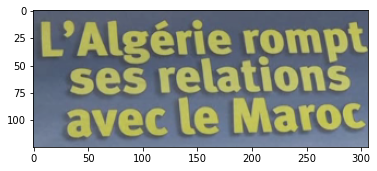

In [3]:
one=plt.imread('2.png')
plt.imshow(one)
one.shape

(125, 307)

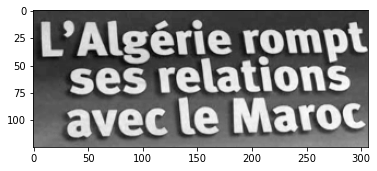

In [4]:
one1= skm.color.rgb2gray(one)
plt.imshow(one1 , cmap='gray')
one1.shape

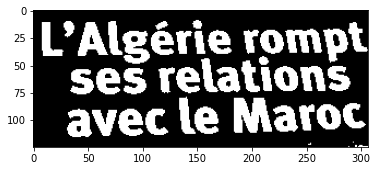

In [5]:
#filtre a utiliser Otsu : 
filt_im = one1 > skm.filters.threshold_otsu(one1)
plt.imshow(filt_im , cmap='gray')

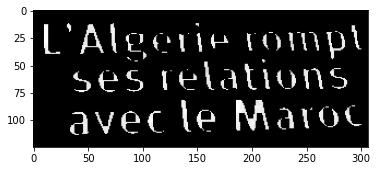

In [6]:
im = Image.fromarray(filt_im)
im.save("filt_im.jpeg")

img=cv2.imread("filt_im.jpeg")

#erosion
kernel = np.ones((5,5), np.uint8)
erim = cv2.erode(img , kernel, iterations = 1)
plt.imshow(erim, cmap='gray')

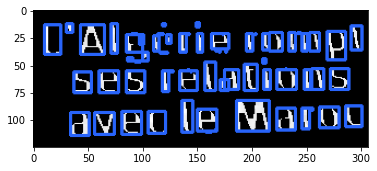

In [10]:
cont = cv2.cvtColor(erim, cv2.COLOR_BGR2GRAY)
(contours, heirarchy) = cv2.findContours(cont, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

img2 = erim.copy()

for ctr in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    
plt.imshow(img2);